In [12]:
import csv
import glob
import os
import pandas as pd
from pandas import DataFrame
import numpy as np  
from IPython.display import Image, display
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
import datetime
from datetime import datetime


## read all csv files, covid daily reports frm April 12th to Augest 20th

#os.chdir("C:\\Users\\Robin\\Documents\\Gatech\\COVID-19-master\\COVID-19-master\\csse_covid_19_data\\csse_covid_19_daily_reports_us")

#extension = "csv"

#all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

#combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames])

#combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')

#combined_csv


,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate,Unnamed: 0
0,Alabama,US,2020-04-12 23:18:15,32.3182,-86.9023,3563,93,NaN,3470.0,1.0,75.988020,21583.0,437.0,2.610160,84000001.0,USA,460.300152,12.264945,NaN
1,Alaska,US,2020-04-12 23:18:15,61.3707,-152.4044,272,8,66.0,264.0,2.0,45.504049,8038.0,31.0,2.941176,84000002.0,USA,1344.711576,11.397059,NaN
2,Arizona,US,2020-04-12 23:18:15,33.7298,-111.4312,3542,115,NaN,3427.0,4.0,48.662422,42109.0,NaN,3.246753,84000004.0,USA,578.522286,NaN,NaN
3,Arkansas,US,2020-04-12 23:18:15,34.9697,-92.3731,1280,27,367.0,1253.0,5.0,49.439423,19722.0,130.0,2.109375,84000005.0,USA,761.753354,10.156250,NaN
4,California,US,2020-04-12 23:18:15,36.1162,-119.6816,22795,640,NaN,22155.0,6.0,58.137726,190328.0,5234.0,2.812020,84000006.0,USA,485.423868,22.961176,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,New York,US,2020-08-20 04:30:22,42.1657,-74.9481,427202,32865,74328.0,320009.0,36.0,2196.009255,7272403.0,89995.0,7.693082,84000036.0,USA,37383.402453,21.066147,91312.0
5105,Texas,US,2020-08-20 04:30:22,31.0545,-97.5635,574633,10934,424685.0,139014.0,48.0,1981.774584,4517189.0,NaN,1.902780,84000048.0,USA,15578.726509,NaN,91325.0
5106,Massachusetts,US,2020-08-21 04:30:30,42.2302,-71.5301,124728,8888,102205.0,13635.0,25.0,1809.618364,1518522.0,12225.0,7.125906,84000025.0,USA,22031.502924,9.801328,91359.0
5107,New York,US,2020-08-21 04:30:30,42.1657,-74.9481,427803,32861,74406.0,320536.0,36.0,2199.098664,7353387.0,89995.0,7.681339,84000036.0,USA,37799.696415,21.036552,91370.0


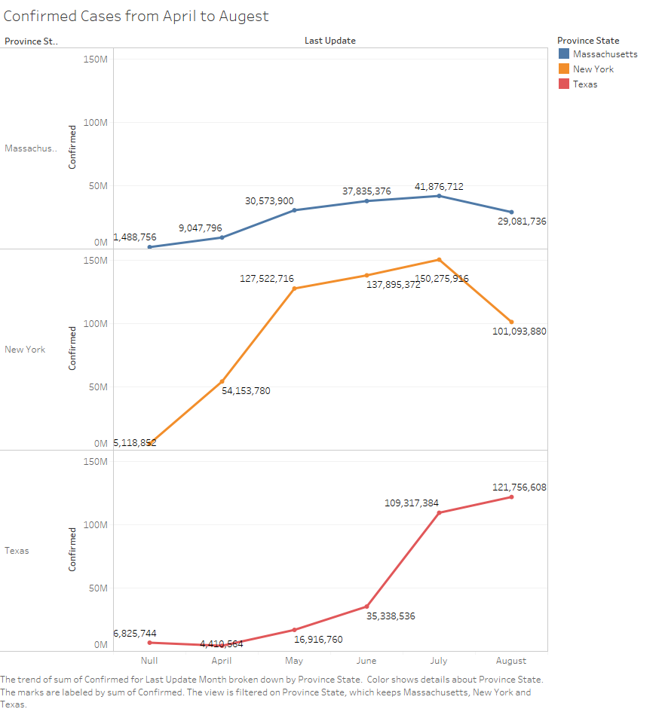

In [2]:
display(Image(filename='C:\\Users\\Robin\\Documents\\corona-analysis\\Comfirmed.png', embed=True))

In [88]:
combined_csv = pd.read_csv (r'combined_csv.csv')

States = ["New York", "Texas", "Massachusetts"]
df = combined_csv[combined_csv.Province_State.isin(States)]


df[['Date', 'Time']] = df.Last_Update.str.split(expand=True)

df['Date'] = pd.to_datetime(df['Date'])
df["death_rate"] = df["Deaths"]/df["Confirmed"]



#%%


ny_df = df[df.Province_State.str.contains("New York")]

tx_df = df[df.Province_State.str.contains("Texas")]

ma_df = df[df.Province_State.str.contains("Massachusetts")]



<ipython-input-88-efd6c6ae259a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])
<ipython-input-88-efd6c6ae259a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["death_rate"] = df["Deaths"]/df["Confirmed"]


Province_State
Massachusetts    AxesSubplot(0.125,0.2;0.775x0.68)
New York         AxesSubplot(0.125,0.2;0.775x0.68)
Texas            AxesSubplot(0.125,0.2;0.775x0.68)
Name: Confirmed, dtype: object

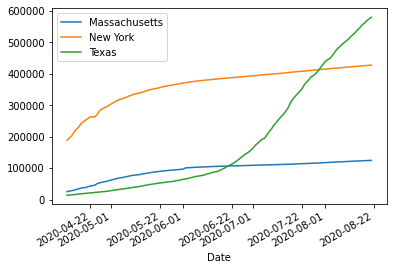

In [90]:
df.set_index('Date', inplace=True)
df.groupby('Province_State')['Confirmed'].plot(legend=True)

Province_State
Massachusetts    AxesSubplot(0.125,0.2;0.775x0.68)
New York         AxesSubplot(0.125,0.2;0.775x0.68)
Texas            AxesSubplot(0.125,0.2;0.775x0.68)
Name: death_rate, dtype: object

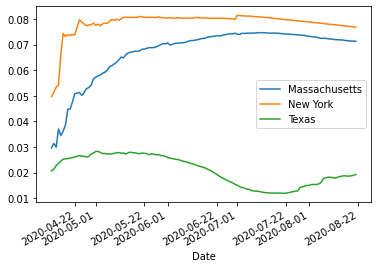

In [92]:

df.groupby('Province_State')['death_rate'].plot(legend=True)

In [4]:
# look at the statistical details of the NY dataset
ny_df.describe()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate,Unnamed: 0
count,2.004300e+04,2.004300e+04,20043.000000,20043.000000,20043.000000,20043.000000,20043.0,20043.000000,2.004300e+04,20043.000000,20043.000000,20043.0,20043.000000,20043.000000,17030.000000
mean,4.216570e+01,-7.494810e+01,366450.709924,28913.916031,62514.778626,278740.030534,36.0,1938.389944,3.302161e+06,81447.312977,7.840019,84000036.0,17136.653786,22.213486,42197.248972
std,1.014680e-11,1.354328e-11,55850.734199,5184.513761,15381.596622,30433.122713,0.0,221.975128,2.096067e+06,13021.051670,0.509364,0.0,10592.321375,0.932948,28118.752582
min,4.216570e+01,-7.494810e+01,189033.000000,9385.000000,23887.000000,179648.000000,36.0,1121.124012,4.616010e+05,42594.000000,4.964742,84000036.0,2737.680538,19.556090,35.000000
25%,4.216570e+01,-7.494810e+01,343051.000000,27641.000000,59758.000000,261351.000000,36.0,1864.769129,1.298757e+06,74433.000000,7.808732,84000036.0,7144.589371,21.584174,17142.000000
50%,4.216570e+01,-7.494810e+01,384575.000000,30909.000000,68938.000000,284728.000000,36.0,1989.173256,3.051778e+06,89995.000000,8.003613,84000036.0,15687.503177,21.885944,41904.000000
75%,4.216570e+01,-7.494810e+01,406807.000000,32495.000000,72161.000000,302151.000000,36.0,2091.169838,5.115470e+06,89995.000000,8.049766,84000036.0,26295.802604,22.873068,66666.000000
max,4.216570e+01,-7.494810e+01,427803.000000,32865.000000,74406.000000,320536.000000,36.0,2199.098664,7.353387e+06,89995.000000,8.141231,84000036.0,37799.696415,24.218809,91370.000000


X = ny_df['Confirmed'].values.reshape(-1,1)
y = ny_df['Deaths'].values.reshape(-1,1)

# spliting 80%  for training data and 20% for testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# training
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)

<ipython-input-85-6d07490580ac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ny_df["death_rate"] = ny_df["Deaths"]/ny_df["Confirmed"]


<AxesSubplot:xlabel='Date'>

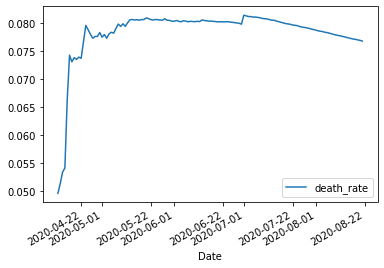

In [85]:
ny_df["death_rate"] = ny_df["Deaths"]/ny_df["Confirmed"]
ny_df

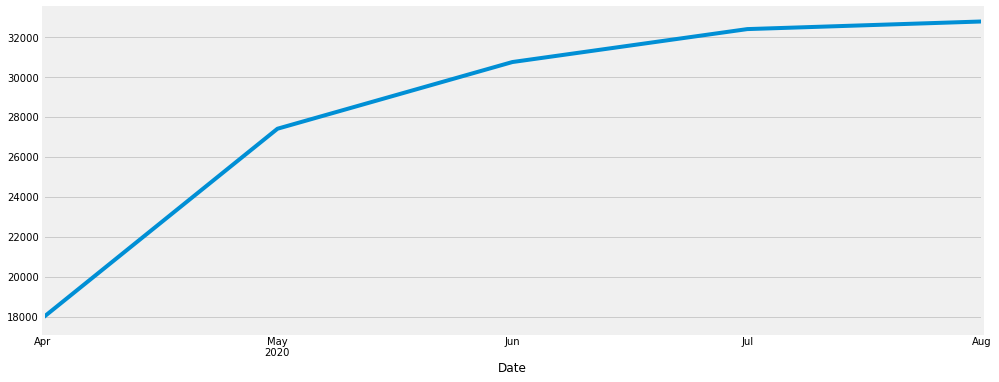

In [19]:
# death plot
ny_death = ny_df['Deaths'].resample('MS').mean()
ny_death.plot(figsize=(15, 6))
plt.show()

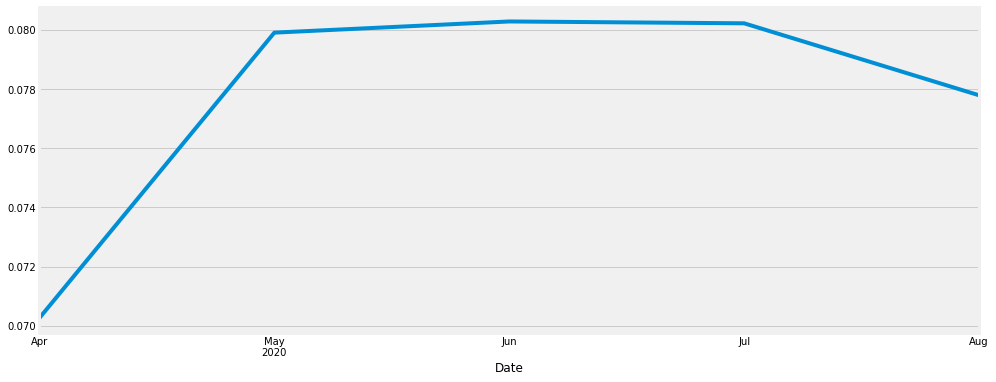

In [18]:
# death rate plot
ny_df["death_rate"] = ny_df["Deaths"]/ny_df["Confirmed"]

ny_confirmed = ny_df['death_rate'].resample('MS').mean()
ny_confirmed.plot(figsize=(15, 6))
plt.show()

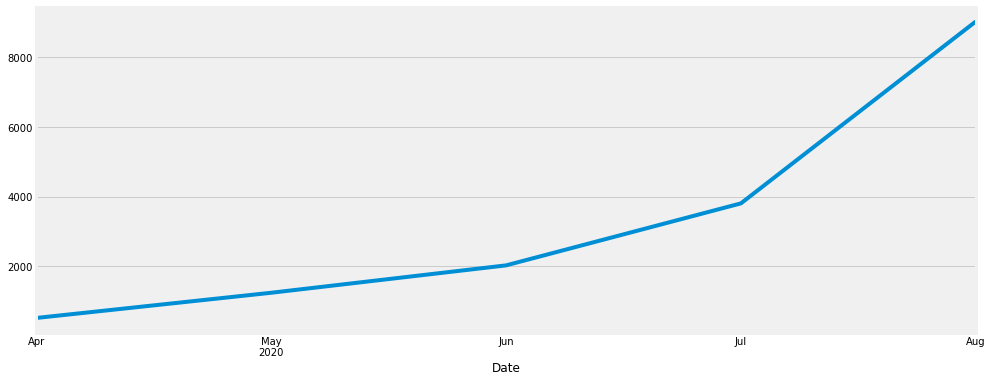

In [20]:
tx_death = tx_df['Deaths'].resample('MS').mean()
tx_death.plot(figsize=(15, 6))
plt.show()

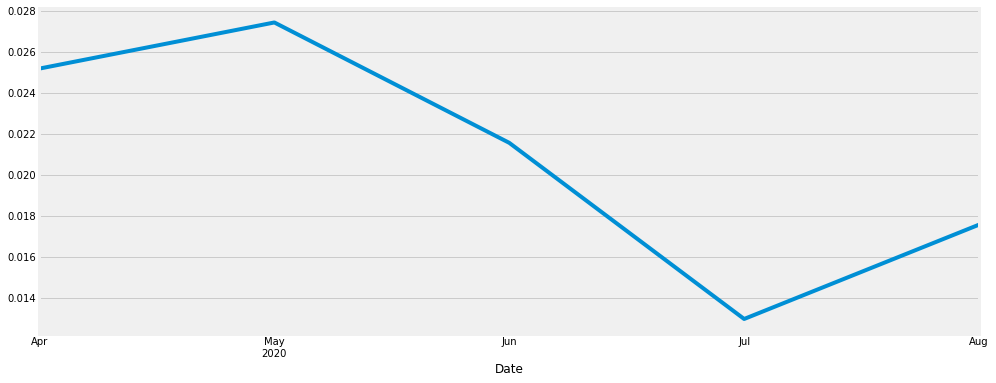

In [22]:
tx_df["death_rate"] = tx_df["Deaths"]/tx_df["Confirmed"]

tx_confirmed = tx_df['death_rate'].resample('MS').mean()
tx_confirmed.plot(figsize=(15, 6))
plt.show()

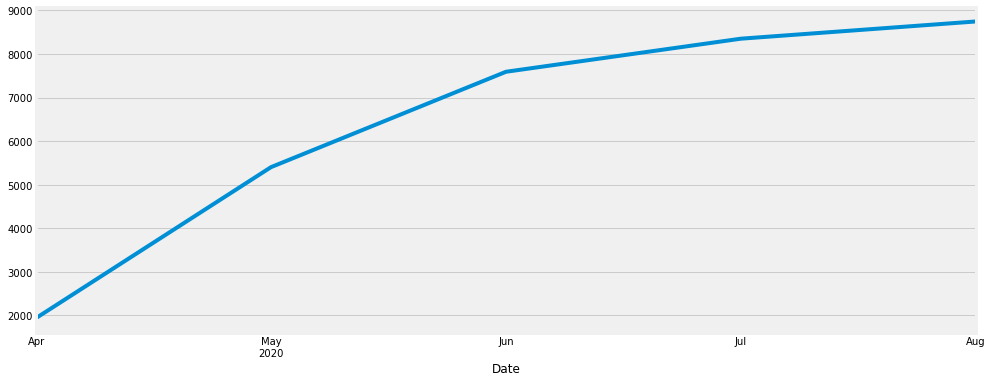

In [23]:
ma_death = ma_df['Deaths'].resample('MS').mean()
ma_death.plot(figsize=(15, 6))
plt.show()

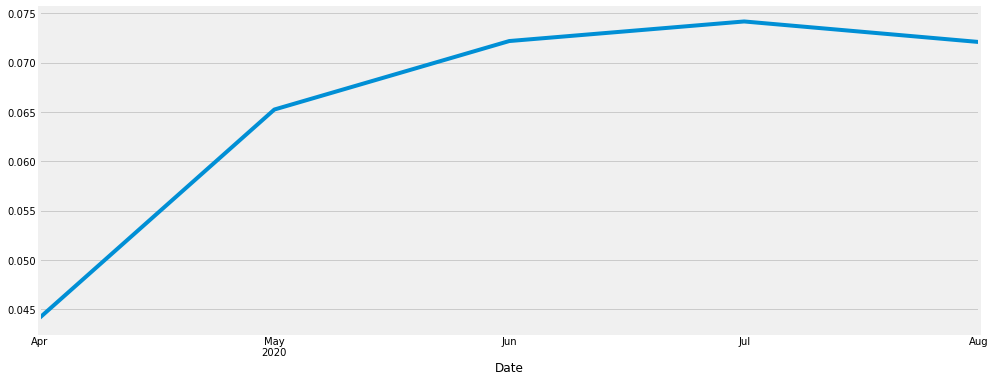

In [24]:
ma_df["death_rate"] = ma_df["Deaths"]/ma_df["Confirmed"]

ma_confirmed = ma_df['death_rate'].resample('MS').mean()
ma_confirmed.plot(figsize=(15, 6))
plt.show()